提取的点位坐标及对应信号强度：
点 1: 坐标 (568, 923), 信号强度 19
点 2: 坐标 (712, 883), 信号强度 26
点 3: 坐标 (544, 844), 信号强度 21
点 4: 坐标 (352, 743), 信号强度 19
点 5: 坐标 (676, 718), 信号强度 26
点 6: 坐标 (372, 696), 信号强度 20
点 7: 坐标 (599, 633), 信号强度 19
点 8: 坐标 (321, 574), 信号强度 29
点 9: 坐标 (724, 497), 信号强度 19
点 10: 坐标 (782, 482), 信号强度 21
点 11: 坐标 (838, 470), 信号强度 19
点 12: 坐标 (326, 448), 信号强度 29
点 13: 坐标 (535, 407), 信号强度 29
点 14: 坐标 (427, 408), 信号强度 29
点 15: 坐标 (282, 396), 信号强度 29
点 16: 坐标 (679, 370), 信号强度 19
点 17: 坐标 (436, 328), 信号强度 29
点 18: 坐标 (577, 301), 信号强度 29
点 19: 坐标 (257, 257), 信号强度 29
点 20: 坐标 (227, 159), 信号强度 29
点 21: 坐标 (539, 113), 信号强度 29
提取的点位坐标已保存到 D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\extracted_points.csv
标注了点和热力图的新图片已保存到 D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_mapped_points_and_heatmap.jpg


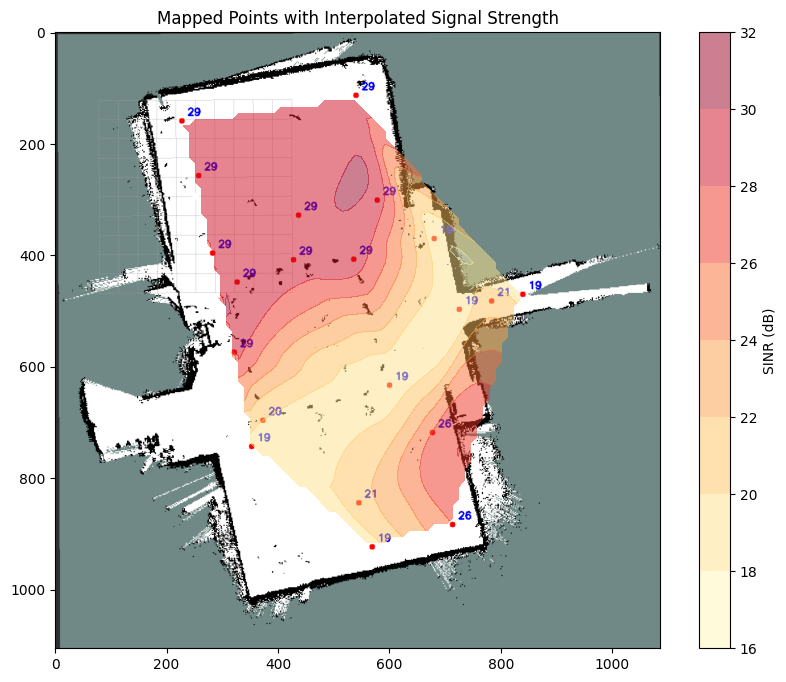

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import csv

# 加载带点的地图
map_with_points_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_testing points.jpg'
image = cv2.imread(map_with_points_path)
if image is None:
    raise FileNotFoundError(f"无法加载图片：{map_with_points_path}")

# 转换为HSV以分离红色点
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (0, 70, 50), (10, 255, 255))  # 红色范围

# 提取点坐标
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
points = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    center_x = x + w // 2
    center_y = y + h // 2
    points.append((center_x, center_y))

# 假设信号强度已手动匹配
sinr_values = [19,26,21,19,26,20,19,29,19,21,19,29,29,29,29,19,29,29,29,29,29]  # 示例信号强度
rsrp_values = [-101,-86,-90,-94,-90,-91,-90,-91,-97,-87,-104,-88,-84,-81,-93,-96,-87,-88,-86,-90,-86]  # 示例信号强度
if len(points) != len(sinr_values):
    raise ValueError("提取的点数量与信号强度值数量不匹配，请检查数据。")

# 打印提取的点位坐标
print("提取的点位坐标及对应信号强度：")
for i, (point, sinr) in enumerate(zip(points, sinr_values)):
    print(f"点 {i + 1}: 坐标 {point}, 信号强度 {sinr}")

# 可选：将点位坐标保存到 CSV 文件
output_csv = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\extracted_points.csv'
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Index", "X", "Y", "SINR"])
    for i, (point, sinr) in enumerate(zip(points, sinr_values)):
        writer.writerow([i + 1, point[0], point[1], sinr])
print(f"提取的点位坐标已保存到 {output_csv}")

# 加载新的图片（没有点位标注的地图）
map_without_points_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_of_R1_Hall.png'
image_without_points = cv2.imread(map_without_points_path)
if image_without_points is None:
    raise FileNotFoundError(f"无法加载图片：{map_without_points_path}")

# 在新图片上绘制提取的点
for point, sinr in zip(points, sinr_values):
    cv2.circle(image_without_points, point, 5, (0, 0, 255), -1)  # 红色点
    cv2.putText(image_without_points, str(sinr), (point[0] + 10, point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# 创建热力图
x, y = zip(*points)
grid_x, grid_y = np.mgrid[0:image_without_points.shape[1]:100j, 0:image_without_points.shape[0]:100j]
grid_z = griddata(points, sinr_values, (grid_x, grid_y), method='cubic')

# 叠加热力图到新图片
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_without_points, cv2.COLOR_BGR2RGB))
plt.contourf(grid_x, grid_y, grid_z, alpha=0.5, cmap='YlOrRd')
plt.colorbar(label='SINR (dB)')
plt.title("Mapped Points with Interpolated Signal Strength")

# 保存标注了点和热力图的新图片
output_image_with_heatmap_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_mapped_points_and_heatmap.jpg'
plt.savefig(output_image_with_heatmap_path)
print(f"标注了点和热力图的新图片已保存到 {output_image_with_heatmap_path}")
plt.show()


提取的点位坐标及对应信号强度：
点 1: 坐标 (568, 923), SINR 19, RSRP -101
点 2: 坐标 (712, 883), SINR 26, RSRP -86
点 3: 坐标 (544, 844), SINR 21, RSRP -90
点 4: 坐标 (352, 743), SINR 19, RSRP -94
点 5: 坐标 (676, 718), SINR 26, RSRP -90
点 6: 坐标 (372, 696), SINR 20, RSRP -91
点 7: 坐标 (599, 633), SINR 19, RSRP -90
点 8: 坐标 (321, 574), SINR 29, RSRP -91
点 9: 坐标 (724, 497), SINR 19, RSRP -97
点 10: 坐标 (782, 482), SINR 21, RSRP -87
点 11: 坐标 (838, 470), SINR 19, RSRP -104
点 12: 坐标 (326, 448), SINR 29, RSRP -88
点 13: 坐标 (535, 407), SINR 29, RSRP -84
点 14: 坐标 (427, 408), SINR 29, RSRP -81
点 15: 坐标 (282, 396), SINR 29, RSRP -93
点 16: 坐标 (679, 370), SINR 19, RSRP -96
点 17: 坐标 (436, 328), SINR 29, RSRP -87
点 18: 坐标 (577, 301), SINR 29, RSRP -88
点 19: 坐标 (257, 257), SINR 29, RSRP -86
点 20: 坐标 (227, 159), SINR 29, RSRP -90
点 21: 坐标 (539, 113), SINR 29, RSRP -86
提取的点位坐标已保存到 D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\extracted_points.csv
标注了点和 SINR 热力图的新图片已保存到 D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_map

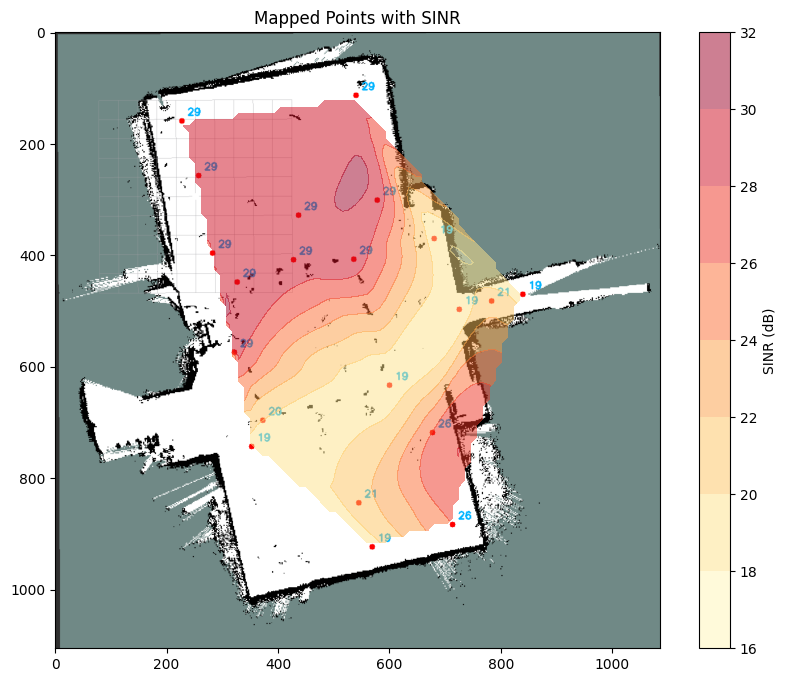

标注了点和 RSRP 热力图的新图片已保存到 D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_mapped_points_and_rsrp_heatmap.png


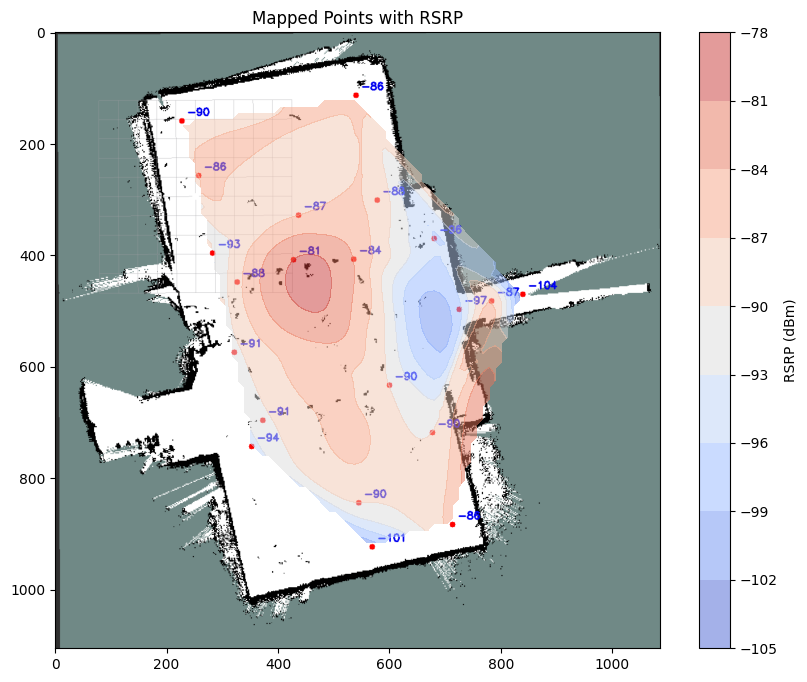

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import csv

# 加载带点的地图
map_with_points_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_testing points.jpg'
image = cv2.imread(map_with_points_path)
if image is None:
    raise FileNotFoundError(f"无法加载图片：{map_with_points_path}")

# 转换为HSV以分离红色点
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (0, 70, 50), (10, 255, 255))  # 红色范围

# 提取点坐标
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
points = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    center_x = x + w // 2
    center_y = y + h // 2
    points.append((center_x, center_y))

# 假设信号强度已手动匹配
sinr_values = [19,26,21,19,26,20,19,29,19,21,19,29,29,29,29,19,29,29,29,29,29]  # SINR 示例信号强度
rsrp_values = [-101,-86,-90,-94,-90,-91,-90,-91,-97,-87,-104,-88,-84,-81,-93,-96,-87,-88,-86,-90,-86]  # RSRP 示例信号强度
if len(points) != len(sinr_values) or len(points) != len(rsrp_values):
    raise ValueError("提取的点数量与信号强度值数量不匹配，请检查数据。")

# 打印提取的点位坐标
print("提取的点位坐标及对应信号强度：")
for i, (point, sinr, rsrp) in enumerate(zip(points, sinr_values, rsrp_values)):
    print(f"点 {i + 1}: 坐标 {point}, SINR {sinr}, RSRP {rsrp}")

# 可选：将点位坐标保存到 CSV 文件
output_csv = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\extracted_points.csv'
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Index", "X", "Y", "SINR", "RSRP"])
    for i, (point, sinr, rsrp) in enumerate(zip(points, sinr_values, rsrp_values)):
        writer.writerow([i + 1, point[0], point[1], sinr, rsrp])
print(f"提取的点位坐标已保存到 {output_csv}")

# 加载新的图片（没有点位标注的地图）
map_without_points_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_of_R1_Hall.png'
image_without_points = cv2.imread(map_without_points_path)
if image_without_points is None:
    raise FileNotFoundError(f"无法加载图片：{map_without_points_path}")

# 在新图片上绘制提取的点
for point in points:
    cv2.circle(image_without_points, point, 5, (0, 0, 255), -1)  # 红色点

# 创建 SINR 热力图
x, y = zip(*points)
grid_x, grid_y = np.mgrid[0:image_without_points.shape[1]:100j, 0:image_without_points.shape[0]:100j]
grid_z_sinr = griddata(points, sinr_values, (grid_x, grid_y), method='cubic')

# 在图片上标注 SINR 值
sinr_image = image_without_points.copy()
for point, sinr in zip(points, sinr_values):
    cv2.putText(sinr_image, str(sinr), (point[0] + 10, point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 180, 0), 2)

# 绘制 SINR 热力图并保存
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(sinr_image, cv2.COLOR_BGR2RGB))
plt.contourf(grid_x, grid_y, grid_z_sinr, alpha=0.5, cmap='YlOrRd')
plt.colorbar(label='SINR (dB)')
plt.title("Mapped Points with SINR")
output_image_sinr_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_mapped_points_and_sinr_heatmap.png'
plt.savefig(output_image_sinr_path)
print(f"标注了点和 SINR 热力图的新图片已保存到 {output_image_sinr_path}")
plt.show()

# 创建 RSRP 热力图
grid_z_rsrp = griddata(points, rsrp_values, (grid_x, grid_y), method='cubic')

# 在图片上标注 RSRP 值
rsrp_image = image_without_points.copy()
for point, rsrp in zip(points, rsrp_values):
    cv2.putText(rsrp_image, str(rsrp), (point[0] + 10, point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 0, 0), 2)

# 绘制 RSRP 热力图并保存
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(rsrp_image, cv2.COLOR_BGR2RGB))
plt.contourf(grid_x, grid_y, grid_z_rsrp, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='RSRP (dBm)')
plt.title("Mapped Points with RSRP")
output_image_rsrp_path = r'D:\KTH-Study\Y2-P1\EQ2443 Project Course\data & map\map_with_mapped_points_and_rsrp_heatmap.png'
plt.savefig(output_image_rsrp_path)
print(f"标注了点和 RSRP 热力图的新图片已保存到 {output_image_rsrp_path}")
plt.show()
